# 서포트벡터머신<sup>Support Vector Machine</sup>을 위한 비선형 계획 문제의 쌍대정리

<p style="text-align: right;">
    2022.04.23 수정<br/>
    2017.10.08 작성<br/>
    조준우 metamath@gmail.com
</p>

<hr/>

서포트벡터머신(이하 SVM)을 공부하다 보면 마지막 과정에서 쌍대문제라는 것이 등장한다. 최소화 문제인 원래 문제를 라그랑지 승수에 대한 최대화 문제로 바꿔서 풀게 되는데 이 때 바뀐 최대화 문제를 원래 문제의 쌍대 문제라 한다. 이 두 문제가 어째서 같은 해를 주게 되는지에 대한 설명은 좀 진지한 SVM 문헌이 아니고서는 잘 나오지 않는다. 그 이유는 쌍대문제를 푸는 궁극적인 목적이 커널트릭에 있으므로 쌍대문제를 그냥 받아드리고 쌍대문제에서 나타나는 커널함수에 대한 설명을 중점적으로 하기 때문인 것으로 보인다. 본 문서는 쌍대문제가 정의되는 과정을 가능한 자세한 수식과 충분한 그림을 중심으로 이야기함으로 원문제와 쌍대문제의 관계를 알아보는 것을 목적으로 한다. 본 글의 주 참고문헌은 [arora_2] 5.5절 DUALITY IN NONLINEAR PROGRAMMING이며, [nocedal], [bazaraa], [boyd]의 내용을 부분 부분 함께 정리, 보충 설명하였다. 참고로 본 문서에서 벡터 미분은 분모 레이아웃을 따른다. 대부분 참고문헌에서 분모 레이아웃을 쓰기 때문에 기호법을 일치시켜 혼란을 방지하기 위함이다. 벡터 미분의 분자, 분모 레이아웃에 대한 자세한 내용은 [jo]를 참고하면 된다.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=4, linewidth =150)
style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.core.display import display, HTML

init_notebook_mode(connected=True)

# https://github.com/plotly/plotly.py/issues/515
# The polling here is to ensure that plotly.js has already been loaded before
# setting display alignment in order to avoid a race condition.
display(HTML(
    '<script>'
        'var waitForPlotly = setInterval( function() {'
            'if( typeof(window.Plotly) !== "undefined" ){'
                'MathJax.Hub.Config({ SVG: { font: "STIX-Web" }, displayAlign: "center" });'
                'MathJax.Hub.Queue(["setRenderer", MathJax.Hub, "SVG"]);'
                'clearInterval(waitForPlotly);'
            '}}, 250 );'
    '</script>'
))

### 등호제약 문제에 대한 국부적 쌍대정리

다음처럼 등호제약조건만 있는 $n$차원 변수 $\mathbf{x}$에 관한 문제로 시작한다. 이렇게 주어진 최적화 문제를 쌍대정리를 이야기할 때 특별히 원시문제<sup>primal problem</sup>라 한다.

<div class="summary">
    Problem E
    
$$
\text{minimize } f(\mathbf{x}) \quad \text{ subject to } h_i(\mathbf{x})=0; \quad i=1, ..., p
$$
</div>

문제 E를 해석적으로 풀기 위해 라그랑지안을 정의하고 KKT-필요조건, 충분조건을 도입하는것이 일반적인 접근법이다. 라그랑지안은 다음과 같고

$$
L(\mathbf{x}, \mathbf{v}) = f(\mathbf{x}) + \sum_{i=1}^{p} v_i h_i = f(\mathbf{x}) + (\mathbf{v} \cdot \mathbf{h})
$$

충분조건 검토를 위한 라그랑지안의 2계 미분인 헤시안은 다음과 같다.

$$
\mathbf{H}_{\mathbf{x}}(\mathbf{x}, \mathbf{v}) = \frac{\partial^2 L}{\partial \, \mathbf{x}^2} = \frac{\partial^2 f(\mathbf{x})}{\partial \, \mathbf{x}^2} + \sum_{i=1}^{p} v_i \frac{\partial^2 h_i}{\partial \, \mathbf{x}^2}
$$

라그랑지 승수정리에 의해 라그랑지안 $L(\mathbf{x}, \mathbf{v})$에서 어떤 지역 최소 $\mathbf{x}^*$에 대해 다음 1계 필요조건이 만족되는 유일한 $\mathbf{v}^*$가 존재한다.  

$$
\begin{aligned}
\frac{\partial \, f(\mathbf{x}^*)}{\partial \, x_i} + \sum_{j=1}^p v_j^* \frac{\partial \, h_j(\mathbf{x}^*)}{\partial \, x_i}=0; \quad \text{$i=1$ to $n$} \\[5pt]
h_j(\mathbf{x}^*) = 0; \quad \text{$j = 1$ to  $p$}
\end{aligned}
$$

위 1계 필요조건을 벡터형식으로 쓰면 다음과 같다.

$$
\frac{\partial \, f(\mathbf{x}^*)}{\partial \, \mathbf{x}} + \sum_{j=1}^p v_j^* \frac{\partial \, h_j(\mathbf{x}^*)}{\partial \, \mathbf{x}}=\mathbf{0}
$$

국부적 쌍대정리를 위해 $\mathbf{x}^*$에서 라그랑지안의 헤시안 $\mathbf{H}_{\mathbf{x}}(\mathbf{x}^*, \mathbf{v}^*)$가 양정<sup>positive definite</sup>임을 가정한다. 이 가정은 라그랑지안이 $(\mathbf{x}^*, \mathbf{v}^*)$에서 국부적으로 볼록하다는 것을 보장하며 $\mathbf{x}^*$에서 최소화 문제에 대해 충분조건이 만족됨을 의미한다. 이 사실은 $\mathbf{x}^*$가 다음 비제약 최소화 문제의 해도 됨을 의미한다.

$$
\underset{\mathbf{x}}{\text{minimize }} L(\mathbf{x}, \mathbf{v}^* )
$$

다시 말해  $\mathbf{x}^*$는 라그랑지안의 변수 $\mathbf{v}$가 $\mathbf{v}^*$로 정해진 함수 $L(\mathbf{x}, \mathbf{v}^* )$의 minimizer가 된다. 이제 $\mathbf{v}$가 꼭 $\mathbf{v}^*$로 정해진 경우가 아닌 임의의 $\mathbf{v}$일 때도 라그랑지안의 minimizer로 어떤 $\mathbf{x}$가 존재하는지 알아보기로 하자.

$\mathbf{H}_{\mathbf{x}}(\mathbf{x}^*, \mathbf{v}^*)$가 양정이므로 $(\mathbf{x}^*, \mathbf{v}^*)$에서 충분히 가까운 $(\mathbf{x}, \mathbf{v})$에서의 헤시안 $\mathbf{H}_{\mathbf{x}}(\mathbf{x}, \mathbf{v})$도 양정이다. 이 부분에 대해 엄밀한 증명을 위해서는 해석학이 필요하나 여기서는 함수 $f(x)$가 양수이면 $x$에서 아주 약간 떨어진 근방에서도 양수라는 정도로 이해하고 넘어가기로 한다. 예를 들어 $f'(x) = 3x^2-5$로 주어지는 $f(x)$의 2계 미분은 $f''(x)=6x$인데 $f(x)$의 아래로 볼록한 점 $x^*=\sqrt{5/3}$에서 $f''(x^*)>0$임이 분명하다. 또한 $x^*$에서 약간 떨어진 어떤 임의의 $x$에 대해서도 $f''(x)>0$가 됨을 알 수 있다. 하지만 $x$가 $x^*$에서 멀리 떨어져서 $x<0$인 영역으로 가게 되면 $f''(x)<0$이 된다. 즉 $f''(x)$가 $x^*$ 근처에서 국부적으로 양수인것이다.

따라서 $\mathbf{v}^*$의 근방 $\mathbf{v}$에 대해 다음 비제약 최소화 문제에 대한 해 $\mathbf{x}$가 $\mathbf{x}^*$ 근방에서 존재한다.

$$
\underset{\mathbf{x}}{\text{minimize }} L(\mathbf{x}, \mathbf{v} ) \quad \text{or} \quad \underset{\mathbf{x}}{\text{minimize }} \left[ f(\mathbf{x}) + \sum_{i=1}^p v_i h_i (\mathbf{x}) \right] \tag{1}
$$

위 문제의 해 $\mathbf{x}$에 대해 다음 1계 필요조건 역시 만족될 것이다.

$$
\frac{\partial L(\mathbf{x}, \mathbf{v})}{\partial \, \mathbf{x}} = \frac{\partial \, f(\mathbf{x})}{\partial \, \mathbf{x}} + \sum_{j=1}^p v_j \frac{\partial \, h_j(\mathbf{x})}{\partial \, \mathbf{x}}=\mathbf{0}  \quad \text{or} \quad \frac{\partial \, f(\mathbf{x})}{\partial \, \mathbf{x}} + \mathbf{N}\mathbf{v} = \mathbf{0} \tag{2}
$$

위 식에서 행렬 $\mathbf{N}$은 등호제약조건을 분모 레이아웃으로 미분한 행렬로 $n \times p$이다. 최소화 시켜야 할 함수 $L(\mathbf{x}, \mathbf{v} )$는 $\mathbf{x}$, $\mathbf{v}$에 대한 함수지만 최소화시켜야 할 변수는 $\mathbf{x}$라는 것을 유의 해야한다. 따라서 식(1)로 정의된 최소화 문제에 대한 해 $\mathbf{x}$는 $\mathbf{v}$가 결정되면 달라지므로 $\mathbf{x}$와 $\mathbf{v}$사이에 함수관계가 성립되어 $\mathbf{x}(\mathbf{v})$로 쓸 수 있다. 다음에 간략히 적은 일반화된 음함수 정리로 부터  $\mathbf{x}$와 $\mathbf{v}$간의 함수 관계 $\mathbf{x}(\mathbf{v})$가 존재함을 보장할 수 있다.

#### 일반화된 음함수 정리<sup>[곽도영]</sup>

일반화된 음함수 정리를 이야기하기 전에 직관적으로 음함수 정리가 무엇인지 알아보기로 하자.
단위원 $x^2 + y^2 = 1$을 나타내는 함수 표현 $y=f(x)$는 존재하지 않는다. $x$ 하나에 대해서 $y$값 두개가 대응되기 때문이다.

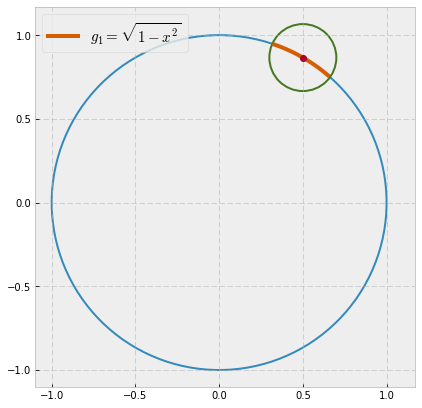

In [2]:
plt.rcParams["figure.figsize"] = (7,7)

x_star = 0.5
y_star = np.sqrt(1 - x_star**2)
delta1 = 0.17
delta2 = 0.15
x_star_nbrh = np.linspace(x_star-delta1, x_star+delta2, 30)
g1 = np.sqrt(1-x_star_nbrh**2)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
circ1 = plt.Circle((0, 0), radius=1, edgecolor=style_colors[0], 
                  facecolor='None', lw=2)
ax.add_patch(circ1)

circ2 = plt.Circle((x_star, y_star), radius=0.2, edgecolor=style_colors[3], 
                  facecolor='None', lw=2)
ax.add_patch(circ2)
plt.plot(x_star_nbrh, g1, color=style_colors[4], lw=4, label=r'$g_1 = \sqrt{1-x^2}$')
plt.plot(x_star, y_star, 'o', color=style_colors[1])
plt.legend(fontsize=15)
plt.axis('square')
plt.show()

하지만 위 그림처럼 임의의 한 점 근처에서 만큼은 어떤 함수 $g(x)$로 표시될 수 있다. 그림에서 빨간점 근방을 나타내는 작은 초록색 원 내부의 굵은 주황색 부분은 $g(x) = \sqrt{1-x^2}$이다. 이처럼 어떤 음함수가 주어졌을 때 임의의 한점 근방에서 한 변수가 다른 변수의 양함수 형태로 표시될 수 있음을 보장해주는 조건에 대한 정리가 음함수 정리이다. 1변수를 다변수로 확장하고 주어진 음함수도 여러개 있는 경우로 내용을 일반화 시켜 보면 다음과 같다. 다변수를 굳이 $x_n$, $v_p$로 나눠 적은 것은 현재 문제와 표기법을 맞추기 위한 것이지 다른 의미는 없다. 

$$
\begin{aligned}
f_1 &(x_1, \dots, x_n, v_1, \dots, v_p) = 0 \\[10pt]
&\vdots \\[10pt]
f_n &(x_1, \dots, x_n, v_1, \dots, v_p) = 0
\end{aligned}
$$

위와 같이 $n+p$개의 변수를 가지는 $n$개의 방정식이 있을 때 변수 $\mathbf{x}$에 대한 야코비안 행렬식<sup>jacobian determinant</sup>을 다음처럼 적기로 하자.

$$
\triangle = \left| 
\begin{matrix} 
\dfrac{\partial f_1}{\partial x_1} & \dfrac{\partial f_1}{\partial x_2}& \cdots & \dfrac{\partial f_1}{\partial x_n} \\[15pt]
\dfrac{\partial f_2}{\partial x_1} & \dfrac{\partial f_2}{\partial x_2}& \cdots & \dfrac{\partial f_2}{\partial x_n} \\[15pt]
\vdots & \vdots & \ddots & \vdots \\[10pt]
\dfrac{\partial f_m}{\partial x_1} & \dfrac{\partial f_m}{\partial x_2}& \cdots & \dfrac{\partial f_n}{\partial x_n} 
\end{matrix} \right|
$$

제시된 연립방정식을 만족하는 점 $(\mathbf{x}^*, \mathbf{v}^*)$에서 $\triangle(\mathbf{x}^*, \mathbf{v}^*) \ne 0$이 만족되면 $(\mathbf{x}^*, \mathbf{v}^*)$ 근방의 위 방정식을 만족하는 점 $(\mathbf{x}, \mathbf{v})$에서 어떤 함수 $\mathsf{x}_1, \dots, \mathsf{x}_n$이 존재하여 다음을 만족한다.


$$
\begin{aligned}
x_1 &= \mathsf{x}_1(v_1, \dots, v_p) \\[10pt]
&\vdots \\[10pt]
x_n &= \mathsf{x}_n(v_1, \dots, v_p)
\end{aligned}
$$

그리고 이 함수 $\mathbf{x}(\mathbf{v})$는 $\mathbf{v}$에 대해 미분 가능하다.<sup>[IFT:wiki]</sup>

즉, 정리하면 "다변수 음함수 연립방정식이 있을 때 그 연립방정식을 만족하는 점 $(\mathbf{x}^*, \mathbf{v}^*)$ 근방에서 하나의 변수를 다른 변수들의 양함수 형태로 기술할 수 있는 조건은  $\triangle(\mathbf{x}^*, \mathbf{v}^*) \ne 0$이다." 라는 정리이다. 이에 대한 증명은 공과대학 대학원 과정을 넘어가는 부분이라 이 문서에서는 다루지 않고 결과를 받아들인 다음 우리 문제로 적용해보기로 한다.

위 음함수 정리를 지금까지 상황에 그대로 적용해보면 제시된 다변수 음함수 연립방정식이 식(2)로 나타낸 필요조건이 되고, 헤시안 $\mathbf{H}_{\mathbf{x}}(\mathbf{x}, \mathbf{v})$는 이 연립방정식들의 야코비안 행렬과 일치한다. 따라서 $\mathbf{H}_{\mathbf{x}}(\mathbf{x}, \mathbf{v})$의 행렬식이 바로 $\triangle(\mathbf{x}, \mathbf{v})$인데 이것이 0이 아니기만하면 $\mathbf{x}(\mathbf{v})$가 존재한다는 말이 된다. 그런데 행렬이 양정이라 함은 행렬식이 0이 아니라는 것을 보장(부록 양정행렬은 정칙행렬인가? 참고)하고, 가정에서 이미 $\mathbf{H}_{\mathbf{x}}(\mathbf{x}^*, \mathbf{v}^*)$가 양정이라 했으므로 $\triangle(\mathbf{x}^*, \mathbf{v}^*) \ne 0$임이 보장된다. 결국 $(\mathbf{x}^*, \mathbf{v}^*)$의 근방에서 필요조건을 만족하는 $(\mathbf{x}, \mathbf{v})$들에 대해서 미분가능한 $\mathbf{x}(\mathbf{v})$가 존재함을 음함수 정리로부터 보장받게 된다.

이제 다음과 같은 쌍대 함수를 정의하자.

####  쌍대함수Dual function

<div class="summary">
Dual Function
<br/> $\mathbf{v}^*$ 근처에서 
$$
\phi(\mathbf{v}) = \underset{\mathbf{x}}{\text{minimize }} L(\mathbf{x}, \mathbf{v}) \quad \text{or} \quad \underset{\mathbf{x}}{\text{minimize }} \left[ f(\mathbf{x}) + \sum_{i=1}^p v_i h_i (\mathbf{x}) \right]
$$
</div>

위 쌍대함수의 함수값은 독립변수로 주어진 $\mathbf{v}$에서 라그랑지안의 최소값이다. 다시말해 주어진 $\mathbf{v}$에서 식(2)에 대한 해로 $\mathbf{v}$와 고유한 함수관계를 가지는 $\mathbf{x}(\mathbf{v})$가 구해지고 그렇게 구해진 $(\mathbf{x}(\mathbf{v}), \mathbf{v})$에서의 라그랑지안 함수값이 쌍대 함수의 함수값이다. 라그랑지안의 헤시안 $\mathbf{H}_{\mathbf{x}}(\mathbf{x}, \mathbf{v})$가 양정이라 가정했으므로 필요조건을 만족시키는 $\mathbf{x}(\mathbf{v})$는 충분조건도 만족시켜 다음과 같은 관계를 가지게 된다.

$$
\phi(\mathbf{v}) = L(\mathbf{x}(\mathbf{v}), \mathbf{v})
$$

<br/><br/>

<img src="lagrangian.png" width="500">


위 그림은 다음 최적화문제에 대한 라그랑지안 $L$과 라그랑지 승수가 특정 숫자 $\hat{u}=0, 2, 4, 6, 8, 10$으로 주어진 $L(x, u=\hat{u})$ 함수들, 그리고 쌍대함수 $\phi(u)$를 나타내고 있다.

$$
\text{min. } x^2  \quad \text{s.t.  } x \ge 2
$$

$u$값을 특정하게 되면 결과로 나타나는 함수 $L(x, u=\hat{u})$는 아래로 볼록한 포물선같은 모양이 되는데 이때 $L(x, u=\hat{u})$를 $x$에 대해서 최소화시킨 값은 그림에서 굵은 파란색 라인 위에 위치하게 된다. 쌍대함수의 정의가 $\phi(\mathbf{v}) = \underset{\mathbf{x}}{\text{minimize }} L(\mathbf{x}, \mathbf{v})$이므로 그림에서 파란색 굵은 선이 쌍대함수가 된다. 그림에 나타난 함수의 자세한 모습은 아래 예제에서 3차원 그래프로 돌려볼 수 있다. 참고로 $L(\mathbf{x},\mathbf{v})$가 $\mathbf{x}$에 대해 최소가 존재하지 않을 수 있으므로 좀 더 엄밀한 교재에서는 쌍대함수를 $\phi(\mathbf{v}) = \text{inf}_{\mathbf{x}} L(\mathbf{x}, \mathbf{v})$로 정의 하기도 한다.<sup>[nocedal],[bazaraa],[boyd]</sup>

정의된 쌍대 함수에 대한 최적화 문제와 관련된 국부적 쌍대 정리를 완성하기 위해 쌍대 함수의 그래디언트와 헤시안을 유도해야 한다.

#### 쌍대함수의 그래디언트

위에서 정의한 쌍대함수의 그래디언트는 다음처럼 주어진다.
$$
\frac{\partial \phi(\mathbf{v})}{\partial \mathbf{v}} =  \mathbf{h}(\mathbf{x}(\mathbf{v})) 
$$

위 결과는 다음과 같은 과정으로 보일 수 있다. 라그랑지안의 벡터 형식 표현은 아래와 같고 

$$
L(\mathbf{x}, \mathbf{v}) = f(\mathbf{x})+(\mathbf{v} \cdot \mathbf{h}) 
$$

$\mathbf{x}(\mathbf{v})$가 식(2)의 필요조건을 만족시키는 해이자 국부 최소라면 쌍대함수는 다음처럼 명시적으로 쓸 수 있다.

$$
\phi(\mathbf{v}) = f(\mathbf{x}(\mathbf{v}))+(\mathbf{v} \cdot \mathbf{h}(\mathbf{x}(\mathbf{v})) 
$$

위 처럼 $\mathbf{x}(\mathbf{v})$에 의해 쌍대함수가 명시적으로 표시될 수 있다는 것은  $(\mathbf{x}, \mathbf{v})$ 근처에서 라그랑지안이 국부적으로 볼록하다는 것을 의미한다. 만약 라그랑지안이 국부적으로 볼록하지 않다면 필요조건의 해 $\mathbf{x}(\mathbf{v})$는 지역 최대점 또는 변곡점이 될 수 있으므로 이를 이용해 쌍대함수를 명시적으로 쓸 수 없어 위 식은 성립하지 않는다. 그러므로 이하 내용은 라그랑지안이 국부적으로 볼록하다는 가정이 필요하다.

이제 쌍대함수 $\phi(\mathbf{v})$를 $\mathbf{v}$로 미분한다. 쌍대함수는 위 식에서처럼 $\mathbf{x}$, $\mathbf{v}$의 함수로 볼 수 도 있지만 여기서 $\mathbf{x}$는 독립변수가 아니라 $\mathbf{v}$에 대해 억제된 변수로 간주한다는 것에 주의해야 한다. 그렇다면 $\mathbf{v}$에 대한 $\phi(\mathbf{v})$의 전체 변화율은 연쇄법칙에 의해 $\phi(\mathbf{v})$를 $\mathbf{v}$만의 함수로 보고 $\mathbf{v}$에 대해 편미분량을 구한 것에 $\phi(\mathbf{v})$를 $\mathbf{x}$, $\mathbf{v}$의 합성함수로 보고 연쇄법칙을 사용한 미분량을 더해주어야 한다.<sup>[미분적분학]</sup>

$$
\frac{d \phi(\mathbf{x}(\mathbf{v}))}{d \mathbf{v}} = \frac{\partial \phi(\mathbf{v})}{\partial \mathbf{v}} + \frac{\partial \mathbf{x}(\mathbf{v})}{\partial \mathbf{v}} \frac{\partial \phi}{\partial \mathbf{x}} = \mathbf{h}(\mathbf{x}(\mathbf{v})) + \frac{\partial \mathbf{x}(\mathbf{v})}{\partial \mathbf{v}} \frac{\partial \phi}{\partial \mathbf{x}} 
$$

 위 미분에서 체인룰이 반대로 적힌것 처럼 보이는데 벡터 미분의 체인룰에서 체인룰을 적는 순서에 대해서는 [colorado_ifem]와 [jo]를 참고하면 된다. 결론만 말하면 여기서는 분모 레이아웃을 쓰고 있으므로 체인의 순서가 오른쪽에서 왼쪽으로 적용되었다. 여기서 $\mathbf{x}(\mathbf{v})$는 음함수정리에 의해 미분 가능하므로 $\dfrac{\partial \mathbf{x}(\mathbf{v})}{\partial \mathbf{v}}$가 가능하고 분모 레이아웃을 쓰기 때문에 $p \times n$ 행렬이다. 그리고 위 식의 $\dfrac{\partial \phi}{\partial \mathbf{x}}$는 0인데 왜냐하면 $\phi$는 이미 $\mathbf{x}$에 대해 최소화된 함수이므로 $\phi$의 $\mathbf{x}$에 대한 변화량은 0이 된다. 따라서 최종적으로 

$$
\frac{\partial \phi(\mathbf{v})}{\partial \mathbf{v}} =  \mathbf{h}(\mathbf{x}(\mathbf{v}))
$$

라는 결과를 얻게 된다.

#### 쌍대함수의 헤시안<sup>[arora_1],[arora_2],[griva]</sup> 

이번에는 위에서 유도한 쌍대함수의 그래디언트를 이용해서 헤시안을 유도 해본다. 위 결과를 이용하여 쌍대함수를 두번 미분하면 다음과 같다.

$$
\mathbf{H}_{\mathbf{v}} = \frac{\partial}{\partial \, \mathbf{v}} \left( \frac{\partial \, \phi (\mathbf{v})}{\partial \, \mathbf{v}} \right) = \frac{\partial \, \mathbf{h}(\mathbf{x}(\mathbf{v}))}{\partial \, \mathbf{v}} = \frac{\partial \, \mathbf{x}(\mathbf{v})}{\partial \, \mathbf{v}} \mathbf{N} 
$$

여기서 $\mathbf{N}$은 제약조건의 그래디언트를 열로 가지는 행렬이다.


이제 $\dfrac{\partial \mathbf{x}(\mathbf{v})}{\partial \mathbf{v}}$를 구해야 한다. $\mathbf{x}(\mathbf{v})$를 명시적으로 알 수 없지만 $\mathbf{v}$에 대한 도함수는 구할 수 있다. 표기를 간단히 하기 위해 앞으로 $\dfrac{\partial }{\partial x}=\nabla_{\mathbf{x}}$로 표시하자. 앞서 쌍대 함수의 그래디언트를 구하는 과정에서 이야기 한것 처럼 쌍대 함수의 $\mathbf{x}$에 대한 변화율은 0이다. 이는 식(2)에서 본 라그랑지안에 대한 필요조건이기도 하다.

$$
\nabla_{\mathbf{x}} \phi(\mathbf{v}) = \nabla_{\mathbf{x}} L(\mathbf{x}(\mathbf{v}), \mathbf{v})= \mathbf{0}
$$

이를 이용하여 $\dfrac{\partial \mathbf{x}(\mathbf{v})}{\partial \mathbf{v}}$를 구한다. 먼저 $\nabla_{\mathbf{x}}L(\mathbf{x}(\mathbf{v}), \mathbf{v})=\mathbf{0}$을 $\mathbf{v}$에 대해 분모 레이아웃으로 미분한다. 우선 $\nabla_{\mathbf{x}}L(\mathbf{x}(\mathbf{v}), \mathbf{v})$를 써보면

$$
\nabla_{\mathbf{x}} \{f(\mathbf{x}(\mathbf{v}) + \mathbf{v}^{\text{T}}\mathbf{h}(\mathbf{x}(\mathbf{v}) \} = \nabla_{\mathbf{x}} f(\mathbf{x}(\mathbf{v}) + \nabla_{\mathbf{x}} \mathbf{h}(\mathbf{x}(\mathbf{v})) \cdot \mathbf{v} \tag{*}
$$

위 식은 식(2)의 좌변과 같다. 두번째 항에 대한 미분은 분모 레이아웃 방식에서 벡터 곱의 미분이 $\dfrac{\partial \mathbf{x}^{\text{T}} \mathbf{a}}{\partial \mathbf{x}}=\mathbf{a}$, $\dfrac{\partial \mathbf{a}^{\text{T}} \mathbf{x}}{\partial \mathbf{x}}=\mathbf{a}$이므로 다음처럼 계산한 결과이다.

$$
\nabla_{\mathbf{x}} \{ \mathbf{v}^{\text{T}} \mathbf{h}(\mathbf{x}(\mathbf{v})) \} = \frac{\partial \mathbf{h}}{\partial \mathbf{x}} \frac{\partial \left( \mathbf{v}^{\text{T}}\mathbf{h} \right)}{\partial \mathbf{h}} = \frac{\partial \mathbf{h}}{\partial \mathbf{x}} \cdot \mathbf{v}
$$

위 식에서 간단한 표기를 위해 함수의 인자는 생략하였으며 역시 분모 레이아웃이므로 체인룰을 순서가 보통의 경우와는 반대가 되었다. 이제 식(\*)를 이용하여 $\nabla_{\mathbf{x}} L(\mathbf{x}(\mathbf{v}), \mathbf{v})=0$를 $\mathbf{v}$로 미분한다. 양변을 $\mathbf{v}$로 미분하면

$$
\begin{aligned}
&\frac{d}{d\mathbf{v}} \{ \nabla_{\mathbf{x}} L(\mathbf{x}(\mathbf{v}), \mathbf{v}) \} = \frac{d}{d\mathbf{v}} \mathbf{0} \\[15pt]
&\nabla_{\mathbf{v}} \{\nabla_{\mathbf{x}} L(\mathbf{x}(\mathbf{v}), \mathbf{v})\} + \nabla_{\mathbf{v}} \mathbf{x}(\mathbf{v}) \cdot \nabla_{\mathbf{xx}} L(\mathbf{x}(\mathbf{v}), \mathbf{v}) = \mathbf{0}
\end{aligned}
$$


위 처럼 미분 되는 이유는 아래 그림으로 설명할 수 있다.

<img src="implicit-diff.png" width="200"/>

쌍대 함수의 그래디언트를 구하는 과정에서와 마찬가지로 $\mathbf{x}$를 $\mathbf{v}$에 대한 내재된 함수로 보고 미분하는 것이다. 고등학교때 배운 음함수 미분법과 같다. 

$\nabla_{\mathbf{xx}} L(\mathbf{x}(\mathbf{v}), \mathbf{v}) = \mathbf{H}_{\mathbf{x}}$와 식(\*)를 위 식에 대입하면

$$
\begin{aligned}
& \nabla_{\mathbf{v}} \{ \nabla_{\mathbf{x}} f(\mathbf{x}(\mathbf{v})) + \nabla_{\mathbf{x}} \mathbf{h}(\mathbf{x}(\mathbf{v})) \cdot \mathbf{v} \} + \nabla_{\mathbf{v}} \{\mathbf{x}(\mathbf{v})\} \mathbf{H}_{\mathbf{x}} = \mathbf{0} \\[10pt]
& \nabla_{\mathbf{v}} \nabla_{\mathbf{x}} f(\mathbf{x}(\mathbf{v})) + \nabla_{\mathbf{v}} \{ \nabla_{\mathbf{x}} \mathbf{h}(\mathbf{x}(\mathbf{v})) \cdot \mathbf{v} \} + \nabla_{\mathbf{v}} \{\mathbf{x}(\mathbf{v})\} \mathbf{H}_{\mathbf{x}} = \mathbf{0} \\[10pt]
& \mathbf{0} + \nabla_{\mathbf{x}} \mathbf{h}(\mathbf{x}(\mathbf{v}))^{\mathbf{T}}  + \nabla_{\mathbf{v}} \{\mathbf{x}(\mathbf{v})\} \mathbf{H}_{\mathbf{x}} = \mathbf{0} 
\end{aligned}
$$

위 결과를 현재까지 쓰던 표기법으로 다시 써보면 다음과 같다.

$$
\mathbf{N}^{\text{T}} + \frac{\partial \mathbf{x}(\mathbf{v})}{\partial \mathbf{v}} \mathbf{H}_{\mathbf{x}} = \mathbf{0}
$$

위 결과를 $\dfrac{\partial \mathbf{x}(\mathbf{v})}{\partial \mathbf{v}}$대해 정리하면

$$
\frac{\partial \mathbf{x}(\mathbf{v})}{\partial \mathbf{v}} = -\mathbf{N}^{\text{T}} \left[ \mathbf{H}_{\mathbf{x}} \right]^{-1}
$$

이 결과를 첫번째 식

$$
\mathbf{H}_{\mathbf{v}} = \frac{\partial}{\partial \, \mathbf{v}} \left( \frac{\partial \, \phi (\mathbf{v})}{\partial \, \mathbf{v}} \right) = \frac{\partial \, \mathbf{h}(\mathbf{x}(\mathbf{v}))}{\partial \, \mathbf{v}} = \frac{\partial \, \mathbf{x}(\mathbf{v})}{\partial \, \mathbf{v}} \mathbf{N} 
$$

에 대입하면 쌍대 함수의 헤시안을 구할 수 있다.

$$
\mathbf{H}_{\mathbf{v}} =-\mathbf{N}^{\text{T}} \left[ \mathbf{H}_{\mathbf{x}} \right]^{-1} \mathbf{N} 
$$

이상의 과정으로 쌍대 함수 $\phi(\mathbf{v})$의 헤시안은 $ \mathbf{H}_{\mathbf{v}}= -\mathbf{N}^{\text{T}} \mathbf{H}_{\mathbf{x}}^{-1} \mathbf{N}$로 주어지며 이는 음정<sup>negative definite</sup>행렬이다. 여기서 $\mathbf{H}_{\mathbf{x}}$는 라그랑지안의 헤시안이며 양정으로 가정했다. $\mathbf{x}^{*}$는 지역 최소이자 정칙점<sup>regular point,[arora_1]</sup>이고 따라서 등호제약조건의 그래디언트는 1차 독립이다. 그러므로 $\mathbf{N}$은 $\mathbf{x}^{*}$에서 많이 떨어지지 않은 근방에서는 풀 칼럼 랭크 행렬이 된다. $ \mathbf{H}_{\mathbf{v}}$가 음정임은 다음처럼 보일 수 있다.
우선 $\mathbf{N}^{\text{T}} \mathbf{H}_{\mathbf{x}}^{-1} \mathbf{N}$가 양반정<sup>positive semi-definite</sup>임을 보인다. 임의의 벡터 $\mathbf{u} \ne \mathbf{0}$에 대해 다음이 성립한다.

$$
\begin{aligned}
\mathbf{u}^{\text{T}} \mathbf{N}^{\text{T}} \mathbf{H}_{\mathbf{x}}^{-1} \mathbf{N} \mathbf{u} &=  \left(\mathbf{u}^{\text{T}} \mathbf{N}^{\text{T}}\right) \mathbf{H}_{\mathbf{x}}^{-1} \left(\mathbf{N} \mathbf{u} \right) \\[10pt]
&= \mathbf{z}^{\text{T}}\mathbf{H}_{\mathbf{x}}^{-1} \mathbf{z} \ge 0 \qquad \because \mathbf{H}_{\mathbf{x}}^{-1} \text{ is positive definite}
\end{aligned}
$$


위 식에서 $\mathbf{Nu}=\mathbf{z}$인데 임의의 $\mathbf{0}$이 아닌 벡터 $\mathbf{u}$에 대해 $\mathbf{N} \mathbf{u} = \mathbf{0}$이 될 수 있다. 그렇게 되면 $\mathbf{N}^{\text{T}} \mathbf{H}_{\mathbf{x}}^{-1} \mathbf{N}$에 $\mathbf{0}$이 아닌 벡터 $\mathbf{u}$를 앞, 뒤로 곱했는데 0이 되기 때문에 위 방법으로 $\mathbf{N}^{\text{T}} \mathbf{H}_{\mathbf{x}}^{-1} \mathbf{N}$가 양반정이라는 것까지 보일 수 있다. 

이제 양정임을 엄밀하게 증명하려면 $\mathbf{N} \mathbf{u} = \mathbf{0}$이 되는 경우는 $\mathbf{u}$가 $\mathbf{0}$벡터인 경우 밖에 없음을 추가로 보여야 하는데 여기서 $\mathbf{N}$이 풀 칼럼 랭크 행렬이라는 사실이 이용된다.<sup>[math.stackexchange_1]</sup> $\mathbf{N}$ 행렬은 다음과 같다.

$$
\mathbf{N} = \begin{bmatrix}
\begin{pmatrix} \dfrac{\partial \, h_1}{\partial \, x_1} \\[10pt] \dfrac{\partial \, h_1}{\partial \, x_2} \\[10pt] \vdots \\[10pt] \dfrac{\partial \, h_1}{\partial \, x_n} \end{pmatrix} & 
\begin{pmatrix} \dfrac{\partial \, h_2}{\partial \, x_1} \\[10pt] \dfrac{\partial \, h_2}{\partial \, x_2} \\[10pt] \vdots \\[10pt] \dfrac{\partial \, h_2}{\partial \, x_n} \end{pmatrix} &
\cdots &
\begin{pmatrix} \dfrac{\partial \, h_p}{\partial \, x_1} \\[10pt] \dfrac{\partial \, h_p}{\partial \, x_2} \\[10pt] \vdots \\[10pt] \dfrac{\partial \, h_p}{\partial \, x_n} \end{pmatrix}
\end{bmatrix}
$$

위 행렬과 임의의 벡터 $\mathbf{u}$의 곱을 행렬의 열들의 선형조합으로 적어보면 다음과 같다.

$$
\mathbf{Nu} = u_1 \mathbf{N}_{:,1} + u_2  \mathbf{N}_{:,2} + \cdots + u_p \mathbf{N}_{:,p}
$$

여기서 $\mathbf{N}_{:,i}$는 행렬 $\mathbf{N}$의 $i$번째 열을 나타낸다. $\mathbf{N}_{:,i}$들은 제약조건의 그래디언트로 1차 독립이므로 위 선형조합이 0이 되는 경우는 $\mathbf{u}=\mathbf{0}$인 경우 밖에 없다. 따라서

$$
\left(\mathbf{u}^{\text{T}} \mathbf{N}^{\text{T}}\right) \mathbf{H}_{\mathbf{x}}^{-1} \left(\mathbf{N} \mathbf{u} \right)  = 0 \implies \mathbf{u}=\mathbf{0}
$$

이 되고, 임의의 벡터 $\mathbf{u} \ne \mathbf{0}$에 대해

$$
\left(\mathbf{u}^{\text{T}} \mathbf{N}^{\text{T}}\right) \mathbf{H}_{\mathbf{x}}^{-1} \left(\mathbf{N} \mathbf{u} \right)  > 0
$$

가 되어 $\mathbf{N}^{\text{T}} \mathbf{H}_{\mathbf{x}}^{-1} \mathbf{N}$는 양정행렬임을 보일 수 있게 된다.

$\mathbf{N}^{\text{T}} \mathbf{H}_{\mathbf{x}}^{-1} \mathbf{N}$가 양정이므로 다음과 같다.

$$
-\left( \mathbf{u}^{\text{T}} \mathbf{N}^{\text{T}} \mathbf{H}_{\mathbf{x}}^{-1} \mathbf{N} \mathbf{u} \right) < 0 \qquad \because \mathbf{N}^{\text{T}} \mathbf{H}_{\mathbf{x}}^{-1} \mathbf{N} \text{ is positive definite}
$$

이상의 결과로 부터 $(\mathbf{x}^*, \mathbf{v}^*)$ 근방에서 $\mathbf{H}_{\mathbf{x}}$가 양정이고 $\mathbf{x}^*$가 정칙점인 경우 쌍대함수를 명시적으로 미분하지 않고도 $\phi(\mathbf{v})$의 헤시안을 구할 수 있다는 것을 알 수 있다. 또 그 경우 쌍대함수는 오목함수<sup>concave function</sup>라는 매우 중요한 사실을 얻게 된다. 

부등호 제약과 함께 있는 경우에 대한 내용은 아래에서 다시 다룬다.



쌍대함수의 헤시안이 음정이라는 사실로 부터 이제 다음과 같은 쌍대 문제<sup>dual problem</sup>를 정의할 수 있다.

#### 쌍대 문제Dual problem

<div class="summary">
Dual Problem
$$
\underset{\mathbf{v}}{\text{maximize }} \phi(\mathbf{v})
$$
</div>

쌍대함수를 최대화하는 쌍대 문제의 경우 원 문제에 있던 제약조건이 사라진 비제약 최대화 문제라는 것을 주목해야한다. 특정 조건하에서 이 비제약 최대화 문제와 원 문제인 제약 최소화 문제가 $(\mathbf{x}^*, \mathbf{v}^*)$에서 충분히 가까운 근방에서 같은 문제이며 이 두 문제의 국부적인 쌍대 관계를 보이는 것이 이 문서의 목적이다. 

#### 등호제약조건에 대한 국부적 강한 쌍대 정리Local Duality Theorem

국소적 쌍대 정리를 이야기하기 전에 쌍대 함수 $\phi(\mathbf{v})$는 $\mathbf{v}^*$근처에서 정의된 함수임을 기억하자.

<div class="summary">
    Local Duality Theorem
    <br/>
    위 정의된 제약 최소화 문제 E에 대해서<br/>
    $\mathbf{v}^*$가 $\mathbf{x}^*$에대한 라그랑지 승수이며 <br/>
    $\mathbf{x}^*$가 지역최소이자 정칙점,<br/>
    $\mathbf{H}_{\mathbf{x}}(\mathbf{x}^*, \mathbf{v}^*)$이 양정이면 다음 최대화 문제
    
$$
\text{maximize } \phi(\mathbf{v})
$$
    는 $\mathbf{v}^*$를 국부적 해로 가진다. 그리고 $\mathbf{v}^*$에 의한 쌍대 문제의 최대값은 원 문제의 $\mathbf{x}^*$에 의한 최소값과 같다. 즉, 다음과 같다.
    
$$
\phi(\mathbf{v}^*) = f(\mathbf{x}^*)
$$
</div>

위 정리를 증명하기 위해서 $\mathbf{v}^*$가 $\phi(\mathbf{v})$에 대해 1계 필요조건과 충분조건을 만족시키는 것을 보인다. 특정 $\mathbf{v}$가 주어졌을 때 식(2)를 만족하는 해는 $\mathbf{x}(\mathbf{v})$이므로 $\mathbf{v}^*$에 대해 필요조건을 만족하는 $\mathbf{x}(\mathbf{v}^*)$는 $\mathbf{x}^*$이다. 즉 다음이 명백하다.

$$
\mathbf{x}^* = \mathbf{x}(\mathbf{v}^*)
$$

다음으로 쌍대함수의 경사도 벡터는 $\mathbf{H}_{\mathbf{x}}(\mathbf{x}^*, \mathbf{v}^*)$이 양정이라는 가정하에 $\dfrac{\partial \phi(\mathbf{v})}{\partial \mathbf{v}}=\mathbf{h}(\mathbf{x}(\mathbf{v}))$이므로 $\mathbf{v}^*$에서 그래디언트는 

$$
\frac{\partial \phi(\mathbf{v}^*)}{\partial \mathbf{v}}=\mathbf{h}(\mathbf{x}(\mathbf{v}^*))=\mathbf{h}(\mathbf{x}^*)
$$

가 된다. $\mathbf{x}^*$는 문제 E의 지역최소이므로 결과적으로 다음과 같다.

$$
\frac{\partial \phi(\mathbf{v}^*)}{\partial \mathbf{v}}=\mathbf{h}(\mathbf{x}(\mathbf{v}^*))=\mathbf{h}(\mathbf{x}^*) = \mathbf{0}
$$

세번째로 $\mathbf{H}_{\mathbf{x}}(\mathbf{x}^*, \mathbf{v}^*)$이 양정이라는 가정하에 $\phi(\mathbf{v})$의 헤시안은 음정이라는 사실을 앞서 유도했다.  이상의 결과를 종합하면 $\mathbf{v}^*$는 $\phi(\mathbf{v})$의 비제약 최대점이 되기 위한 1계 필요조건과 충분조건을 만족시킴을 알 수 있다. 즉, $\mathbf{v}^*$가 $\text{maximize } \phi(\mathbf{v})$의 최대점으로써 지역 최적해임을 보였다.<sup>1)</sup> 

이제 $\phi(\mathbf{v}^*) = f(\mathbf{x}^*)$임은 $\mathbf{v}^*$를 쌍대함수의 정의에 대입하면 보일 수 있다.

$$
\begin{aligned}
\phi(\mathbf{v}^*) &= f(\mathbf{x}(\mathbf{v}^*))+(\mathbf{v}^* \cdot \mathbf{h}(\mathbf{x}(\mathbf{v}^*))) \\[10pt]
&= f(\mathbf{x}^*)+\left(\mathbf{v}^* \cdot \mathbf{h}(\mathbf{x}^*) \right) \\[10pt]
&= f(\mathbf{x}^*) \qquad \because \mathbf{h}(\mathbf{x}^*) = \mathbf{0}
\end{aligned}
$$

만약 라그랑지안 헤시안 $\mathbf{H}_{\mathbf{x}}(\mathbf{x}^*, \mathbf{v}^*)$이 양정이 아니면 위 식에서 첫번째 등식 $\phi(\mathbf{v}^*) = f(\mathbf{x}(\mathbf{v}^*))+(\mathbf{v}^* \cdot \mathbf{h}(\mathbf{x}(\mathbf{v}^*)) $ 이 이미 성립하지 않는다. 이 식의 좌변은 $\mathbf{x}$에 대해 최소회된 상태인데 라그랑지안이 볼록 함수가 아니면 $f(\mathbf{x}(\mathbf{v}^*))+(\mathbf{v}^* \cdot \mathbf{h}(\mathbf{x}(\mathbf{v}^*)) $보다 더 작은 $\phi(\mathbf{v}^*)$이 어딘가에 존재할 수 있다. 다음 그림은 추가 예제 1번<sup>[daul_exam]</sup>의 라그랑지안과 최적해를 표시한 그림이다. (그림의 예제 1은 부등식 제약조건이 있는 문제로 그림의 라그랑지 승수가 $u$로 표시되어야 하나 기호 통일을 위해 그냥 $v$로 표시함)

 
<img src="local-dual.png" width="450" />

그림에 해당하는 문제는 최적해(그림에서 빨간 원) 주변의 라그랑지안이 볼록함수가 아니다. 이 경우 그림처럼 $v^*$의 동일선상에서 $L(x^*, v^*)$보다 다 작은 값이 존재할 수 있다. 검은색 굵은 선이 $v$상에서 $x$를 최소화 시킨 값을 모아 그린것으로 쌍대함수를 나타내고 있다. $v^*=185.5$인 빨간선이 w형상을 하고 있는데 그림 아래쪽에 $L(x^*, v^*)$보다 함수값이 더 작은 위치가 존재한다. 이런 현상이 발생할 수 있기 때문에 강한 쌍대성의 성립을 위해 라그랑지안의 헤시안이 양정이라는 사실은 꼭 만족되어야 한다. 추가 예제 1에 대한 자세한 풀이는 [daul_exam]를 참고하면 된다.

***

<div class="comment">
1) 사실은 쌍대함수가 전 영역에서 오목함수이므로 필요조건만으로도 전역적 최대임이 보장된다. "만일 문제의 볼록성을 확인할 수 있으면 필요조건의 어떠한 해도 자동적으로 충분조건을 만족한다."[arora_2] p.182
<br/><br/>
</div>

### 부등호 제약 문제에 대한 국부적 쌍대정리

문제 E에 부등호 제약조건을 추가하여 동일한 과정으로 쌍대함수와 쌍대문제를 정의할 수 있다.

<div class="summary">
    Problem P
    
$$
\begin{aligned}
\text{minimize } f(\mathbf{x}) \quad \text{ subject to } & h_i(\mathbf{x})=0; \quad i=1, \cdots, p \\[10pt]
& g_j(\mathbf{x}) \leq 0; \quad j = 1, \dots, m
\end{aligned}
$$
</div>

문제 P의 유용역역 $\mathcal{S}$는 다음과 같다.

$$
\mathcal{S} = \{\mathbf{x} \mid h_i(\mathbf{x})=0, i=1 \,\text{to}\, p; \quad g_j(\mathbf{x}) \leq 0, j=1 \,\text{to}\, m \}
$$

라그랑지안은 다음과 같다.

$$
\begin{aligned}
L(\mathbf{x}, \mathbf{v}, \mathbf{u}) &= f(\mathbf{x}) + \sum_{i=1}^p v_i h_i + \sum_{j=1}^m u_j g_j \\[10pt]
&= f(\mathbf{x}) + (\mathbf{v} \cdot \mathbf{h}) + (\mathbf{u} \cdot \mathbf{g}); \quad u_j \geq 0, j=1 \,\text{to}\, m
\end{aligned}
$$

문제 P에 대한 쌍대함수는 다음과 같이 정의된다. 부등호 제약조건에 대한 라그랑지 승수가 추가되고 이에 대한 제약이 추가된 것 이외에는 문제 E 경우와 동일하다.

<div class="summary">
Dual Function
<br/> $\mathbf{v}^*$ 근처에서 
$$
\phi(\mathbf{v}, \mathbf{u}) = \underset{\mathbf{x}}{\text{minimize }} L(\mathbf{x}, \mathbf{v}, \mathbf{u}); \quad u_j \geq 0, j=1 \,\text{to}\, m
$$
</div>

쌍대문제는 다음과 같다.

<div class="summary">
Dual Problem
$$
\underset{\mathbf{v}, \mathbf{u}}{\text{maximize }} \phi(\mathbf{v}, \mathbf{u});\quad u_j \geq 0, j=1 \,\text{to}\, m
$$
</div>

#### 부등호 제약조건이 있을 때 쌍대함수의 헤시안

등호 제약조건에 대응하는 라그랑지 승수 $\mathbf{v}$와 부등호 제약조건에 대응하는 라그랑지 승수 $\mathbf{u}$를 묶어 다음처럼 $\boldsymbol{\beta}$로 두자.

$$
\boldsymbol{\beta} = \begin{pmatrix} \mathbf{v} \\ \mathbf{u} \end{pmatrix}
$$

그러면 쌍대함수는 $\boldsymbol{\beta}$함수 $\phi(\boldsymbol{\beta})$로 쓸 수 있다. 쌍대함수의 헤시안 $\mathbf{H}_{\boldsymbol{\beta}}$이 양정임을 확인하기 위해서는 기본적으로 모든 임의의 벡터 $\boldsymbol{\beta}$를 고려 해야한다. 등호 제약조건만 있는 경우와 마찬가지로 라그랑지안의 해시안 $\mathbf{H}_{\mathbf{x}}$는 양정임을 가정하고, $(\mathbf{x}^*, \mathbf{v}^*)$의 근방만을 고려하자. $\mathbf{x}^*$가 KKT 조건을 만족하는 국부 최소라면 아래 그림과 같은 상황이 될 것이다.

<img src="ineq_hess1.png" width="400"/>

위 그림에서 국부 최소 $\mathbf{x}^*$가 결정되었을 때 $g_i(\mathbf{x})$는 활성 제약조건, $g_j(\mathbf{x})$는 만족 제약조건이 된다. 만족 제약조건에 대응하는 라그랑지 승수는 $u_j=0$이다. 그림에서 보라색 원으로 나타낸 $\mathbf{x}^*$의 근방에서 만족 제약조건에 대응하는 $u_j$는 여전히 0임을 알 수 있다. 따라서 국부적 쌍대성을 고려할 때 쌍대함수의 헤시안이 양정임을 확인하기 위해서는 만족 제약조건에 대응되는 라그랑지 승수가 0으로 고정된 $\boldsymbol{\beta}$ 벡터만 고려하면 된다. $\mathbf{x}^*$는 KKT 조건을 만족하므로 정칙점이고 $\mathbf{x}^*$에서 활성 제약조건과 등호 제약조건의 경사도 벡터는 모두 선형독립인 LICQ를 만족한다.

등호 제약조건만 있을  경우 제약조건을 미분한 행렬 $\mathbf{N}$은 풀 칼럼 랭크이므로 $\mathbf{N} \mathbf{u} = \mathbf{0}$이 되는 벡터 $\mathbf{u}$는 $\mathbf{0}$가 유일했다. 부등호 제약조건이 있다면 $\mathbf{N}$이 풀 칼럼 랭크행렬이 아닌데 문제가 되는 열 벡터는 만족 제약조건을 미분한 열 벡터가 된다. 그런데 $\mathbf{N}$에 곱하는 $\boldsymbol{\beta}$는 전술한 것 처럼 만족 제약조건과 곱해지는 엘리먼트가 모두 0인 벡터이다. 그림으로 보면 다음과 같다.

<img src="ineq_hess2.png" width="700"/>

그림에서 파란색 열벡터들은 등호 제약조건과 활성 부등호 제약조건을 미분한 열 벡터들이라 하자. 따라서 모두 선형독립이다. 빨간색 벡터가 만족 부등호 제약조건을 미분한 열 벡터라면 이 벡터 때문에 $\mathbf{N}$이 풀 칼럼 랭크행렬이라는 보장을 할 수 없게 된다. 하지만 이 벡터와 곱해지는 $\boldsymbol{\beta}$의 요소 $u_3$이 0이기 때문에 사라지고 남아있는 열 벡터들은 모두 선형독립이 된다.

등호 제약조건, 활성 부등호 제약조건에 해당하는 인덱스의 집합을 $\mathcal{I}$, 만족 부등호 제약조건에 해당하는 인덱스의 집합을 $\mathcal{J}$라고 하자.

$$
\mathbf{N}\boldsymbol{\beta} = \sum_{i \in \mathcal{I}} \beta_i \mathbf{N}_{:,i} + \sum_{j \in \mathcal{J}} \beta_j \mathbf{N}_{:,j} = \mathbf{0}
$$

위 식에서 이야기한 바와 같이 $ \sum_{j \in \mathcal{J}} \beta_j \mathbf{N}_{:,j} = \mathbf{0}$ 이므로 

$$
\mathbf{N}\boldsymbol{\beta} = \sum_{i \in \mathcal{I}} \beta_i \mathbf{N}_{:,i}  = \mathbf{0}
$$

이 되는데 $\mathbf{N}_{:,i}$들은 모두 선형독립이므로 위 식을 만족시키는 $\beta_i$는 모두 0이 되어야 한다. 따라서 쌍대함수의 헤시안이 양정임을 확인하기 위해 고려해야하는 벡터들 중 $\mathbf{N}\boldsymbol{\beta}$를 $\mathbf{0}$로 만드는 벡터는 $\boldsymbol{\beta}=\mathbf{0}$가 유일하다. 이후 과정은 등호 제약조건만 있는 경우와 동일하게 쌍대함수의 헤시안이 음정임을 보일 수 있다. 

#### 쌍대함수는 오목함수

라그랑지안이 적어도 국부적으로 볼록할 때 그 근방에서 쌍대함수의 헤시안이 음정이라는 사실을 위에서 이야기 했다. 사실 쌍대함수는 전역적으로 오목한 함수이다. 

> Since the dual function is the pointwise infimum of a family of affine functions of $(\lambda, v)$, it is concave, *even when the problem (5.1) is not convex.*
<br/>
Convex Optimization, Stephen Boyd, p.216

위 인용부에서 $(\lambda, v)$는 라그랑지 승수를, problem (5.1)은 원시문제를 나타낸다. 이 사실은 위 문헌의 내용대로 원문제가 볼록계획문제가 아니라 하더라도 성립한다. 쌍대함수의 헤시안을 직접구하지 않고 쌍대함수가 전역적으로 오목하다는 것을 보일 수 있다. 이에 대한 증명은 아래와 같다.<sup>[bazaraa:thm6.3.1, nocedal:thm12.10]</sup>


먼저 쌍대함수를 infimum으로 다시 정의 하자. 간단한 표기를 위해 제약조건 $\mathbf{h}$, $\mathbf{g}$를 함께 $\mathbf{c}$로 쓰고 $\mathbf{v}$, $\mathbf{u}$를 $ \boldsymbol{\beta}$로 함께 쓰기로 하자.

$$
\phi(\boldsymbol{\beta}) = \underset{\mathbf{x}}{\text{inf }}L(\mathbf{x}, \boldsymbol{\beta}) = \underset{\mathbf{x}}{\text{inf }} \{ f(\mathbf{x}) + \boldsymbol{\beta} \cdot \mathbf{c}(\mathbf{x})\}
$$

그리고 infimum에 대한 성질을 이용한다.<sup>[math125b],[proofwiki],[math.stackexchange_2] </sup>  
infimum은 최대 하한이므로 임의의 $\mathbf{x}$에 대해 각 함수의 함수값의 합은 각 함수의 최대 하한을 더한 것보다 같거나 큰것은 당연하다.

$$
f(\mathbf{x})+g(\mathbf{x}) \geq \underset{\mathbf{x}}{\text{inf }}f(\mathbf{x}) + \underset{\mathbf{x}}{\text{inf }} g(\mathbf{x})
$$

위 식에서 등호는 함수 $f(\mathbf{x})$와 $g(\mathbf{x})$의 infimum이 달성되는 $\mathbf{x}$가 서로 같은 경우에 성립된다. 위 식은 $\underset{\mathbf{x}}{\text{inf }}f(\mathbf{x}) + \underset{\mathbf{x}}{\text{inf }} g(\mathbf{x})$가 함수 $f(\mathbf{x})+g(\mathbf{x})$의 하한이라는 것을 의미한다. $\underset{\mathbf{x}}{\text{inf }} \{f(\mathbf{x})+g(\mathbf{x})\}$는  $f(\mathbf{x})+g(\mathbf{x})$의 최대 하한을 의미하므로 최종적으로

$$
\underset{\mathbf{x}}{\text{inf }} \{f(\mathbf{x})+g(\mathbf{x})\} \geq \underset{\mathbf{x}}{\text{inf }} f(\mathbf{x}) + \underset{\mathbf{x}}{\text{inf }} g(\mathbf{x})
$$

이제 임의의 라그랑지 승수를 $\boldsymbol{\beta}_1$, $\boldsymbol{\beta}_2$로 두고, 0과 1사이의 임의의 양수를 $\lambda$로 두자.

$$
\begin{aligned}
\phi(\lambda \boldsymbol{\beta}_1 + (1-\lambda)\boldsymbol{\beta}_2) &=\underset{\mathbf{x}}{\text{inf }} \{ f(\mathbf{x}) + [\lambda \boldsymbol{\beta}_1 + (1-\lambda)\boldsymbol{\beta}_2] \cdot \mathbf{c} \} \\[10pt]
&= \underset{\mathbf{x}}{\text{inf }} \{ \lambda[f(\mathbf{x})+\boldsymbol{\beta}_1 \cdot \mathbf{c}] + (1-\lambda)[f(\mathbf{x})+\boldsymbol{\beta}_2 \cdot \mathbf{c}] \} \\[10pt]
& \geq \lambda \underset{\mathbf{x}}{\text{inf }} \{f(\mathbf{x})+\boldsymbol{\beta}_1 \cdot \mathbf{c} \} + (1-\lambda) \underset{\mathbf{x}}{\text{inf }} \{ f(\mathbf{x})+\boldsymbol{\beta}_2 \cdot \mathbf{c} \} \\[10pt]
&= \lambda \phi(\boldsymbol{\beta}_1) + (1-\lambda) \phi(\boldsymbol{\beta}_2)
\end{aligned}
$$

오목함수 정의는 $f(\lambda x + (1-\lambda) y) \geq \lambda f(x) + (1-\lambda) f(y)$이고 위 결과는 정의와 일치하므로 쌍대함수는 오목함수가 된다.

#### 약한 쌍대정리Weak Duality Theorem

어떤 $(\mathbf{x}$, $\mathbf{v})$에서 라그랑지안의 헤시안이 양정이 아니라면 $(\mathbf{x}$, $\mathbf{v})$는 국부 최소점이라 할 수 없고 기껏해야 후보최적점이거나 KKT 필요조건을 적용하기 전이라면 보통의 경우 유용해<sup>feasible solution</sup>가 된다. 따라서 $(\mathbf{x}$, $\mathbf{v})$가 유용해일 경우 쌍대 함수와 원함수의 관계에 대해 알아볼 필요가 있다.

<div class="summary">
    Weak Duality Theorem
    <br/>
    $\mathbf{x}$를 문제 P에 대한 유용해라 하고, $\mathbf{v}$, $\mathbf{u}$를 쌍대 문제의 유용해라 하자. 그러면 다음 관계가 있다.

$$
\phi(\mathbf{v}, \mathbf{u}) \leq f(\mathbf{x}) 
$$
</div>

증명은 다음과 같다.

$$
\begin{aligned}
\phi(\mathbf{v}, \mathbf{u}) &= \underset{\mathbf{x}}{\text{minimize }} L(\mathbf{x}, \mathbf{v}, \mathbf{u}) \\[10pt]
&= \underset{\mathbf{x}}{\text{minimize }} \left[ f(\mathbf{x}) + \mathbf{v} \cdot \mathbf{h} + \mathbf{u} \cdot \mathbf{g} \right] \\[10pt]
& \leq f(\mathbf{x}) + \mathbf{v} \cdot \mathbf{h} + \mathbf{u} \cdot \mathbf{g} \leq f(\mathbf{x})
\end{aligned}
$$

위 과정에서 첫번째 부등호는 $\underset{\mathbf{x}}{\text{minimize }}[ \, ]$에 의해 성립한다. 두번째 부등호는 다음과 같은 이유로 성립한다. $\mathbf{x}$가 문제 P의 유용해이므로 $\mathbf{h}(\mathbf{x})=\mathbf{0}$이 된다. 따라서 $\mathbf{v} \cdot \mathbf{h}=\mathbf{0}$이다. 부등호 제약조건인 경우에 대해서는 $\mathbf{x}$가 유용해이므로 제약조건은 만족 또는 활성 제약조건이 이 경우 $g_i(\mathbf{x}) \leq 0$임이 명백하고, 상응하는 라그랑지 승수는 $u_i \geq 0$이므로 $u_i g_i(\mathbf{x}) \leq 0$가 된다. 

#### 강한 쌍대정리Strong Duality Theorem

최종적으로 등호, 부등호 제약조건이 있는 문제 P에 대한 국부적 강한 쌍대 정리는 다음과 같다.

<div class="summary">
    Strong Duality Theorem
    <br/>
    문제 P<br/>
    $$
    \begin{aligned}
    \text{minimize } f(\mathbf{x}) \quad \text{ subject to } & h_i(\mathbf{x})=0; \quad i=1, \cdots, p \\[10pt]
    & g_j(\mathbf{x}) \leq 0; \quad j = 1, \dots, m
    \end{aligned}
    $$<br/>
    에 대해서<br/>
    $\mathbf{x}^*$가 지역최소이자 정칙점으로 문제 P에 대한 국소적 최소점이며,<br/>
    $\mathbf{v}^*$, $\mathbf{u}^*$가 $\mathbf{x}^*$에 대한 라그랑지 승수이며 <br/>
    $\mathbf{H}_{\mathbf{x}}(\mathbf{x}^*, \mathbf{v}^*, \mathbf{v}^*)$가 양정이면 <br/>
    <br/>
    $\mathbf{v}^*$, $\mathbf{u}^*$는 위에서 정의한 쌍대문제의 해이며 $f(\mathbf{x}^*)=\phi(\mathbf{v}^*, \mathbf{u}^*)$가 된다.
</div>
<br/>

이에 대한 증명은 다음과 같다. <sup>[nocedal:thm12.12]</sup> 헤시안이 양정이므로 라그랑지안은 $\mathbf{x}^*$, $\mathbf{v}^*$, $\mathbf{u}^*$ 근방에서 국부적으로 $\mathbf{x}^*$에 대해 볼록, 다르게 말하면 $\mathbf{H}_{\mathbf{x}}(\mathbf{x}^*, \mathbf{v}^*, \mathbf{v}^*)$가 양정이므로 다음이 성립한다.

$$ 
L(\mathbf{x}, \mathbf{v}^*, \mathbf{u}^*) \geq L(\mathbf{x}^*, \mathbf{v}^*, \mathbf{u}^*)
$$

즉, 라그랑지안에 $\mathbf{v}$, $\mathbf{u}$를 $\mathbf{v}^*$, $\mathbf{u}^*$로 고정하고 임의의 $\mathbf{x}$를 대입한 결과는 $L(\mathbf{x}^*, \mathbf{v}^*, \mathbf{u}^*)$보다 항상 크거나 같다.

따라서 

$$
\phi(\mathbf{v}^*, \mathbf{u}^*) = \underset{\mathbf{x}}{\text{minimize }} L(\mathbf{x}, \mathbf{v}^*, \mathbf{u}^*) = L(\mathbf{x}^*, \mathbf{v}^*, \mathbf{u}^*) \tag{*}
$$

위 식의 두번째 등호가 성립한다. 이제 $L(\mathbf{x}^*, \mathbf{v}^*, \mathbf{u}^*)$를 다시 써보면

$$
L(\mathbf{x}^*, \mathbf{v}^*, \mathbf{u}^*) = f(\mathbf{x}^*) + (\mathbf{v}^* \cdot \mathbf{h}) + (\mathbf{u}^* \cdot \mathbf{g}); \quad u_j \geq 0, j=1 \,\text{to}\, m
$$

여기서 $\mathbf{x}^*$가 문제 P의 해로써 정칙점이므로 $(\mathbf{x}^*, \mathbf{v}^*, \mathbf{u}^*)$는 KKT 조건을 만족한다. 때문에 위 식에서 등호제약조건에 대해서 $\mathbf{v}^* \cdot \mathbf{h}=\mathbf{0}$이고, 부등호 제약조건에 대해서는 전환조건<sup>switching condition, complementary slackness</sup> 에 의해 $\mathbf{u}^* \cdot \mathbf{g}=\mathbf{0}$이다. 따라서 최종적으로 

$$
\phi(\mathbf{v}^*, \mathbf{u}^*) = \underset{\mathbf{x}}{\text{minimize }} L(\mathbf{x}, \mathbf{v}^*, \mathbf{u}^*) = L(\mathbf{x}^*, \mathbf{v}^*, \mathbf{u}^*) =  f(\mathbf{x}^*)
$$

결론적으로 $\phi(\mathbf{v}^*, \mathbf{u}^*) = f(\mathbf{x}^*)$이고, 약한 쌍대정리에 의해 $\phi(\mathbf{v}, \mathbf{u}) \leq f(\mathbf{x}^*)$이므로, 최대화 문제인 쌍대 문제의 해는 $(\mathbf{v}^*, \mathbf{u}^*)$가 된다.

약한 쌍대정리에 대한 매우 중요한 사실은 원 문제가 볼록계획문제가 아니더라도 전역적으로 항상 성립한다는 것이다. 따라서 라그랑지안의 헤시안이 양정이 아니라면 등호제약조건만 있는 경우와 같이 식(\*)가 성립하지 않으며 $(\mathbf{x}^*, \mathbf{v}^*, \mathbf{u}^*)$에서 약한 쌍대정리만 성립하여 쌍대차<sup>duality gap</sup>가 생기게 된다.

### 예제

- 보통의 최적화 문제 예제는 적어도 변수가 2개 또는 제약조건이 2개인 문제가 나오지만 그렇게 되면 라그랑지안을 그릴 수 없기 때문에 그림으로 문제를 이해하기 위해 여기서는 변수 1개, 제약조건 1개인 가장 간단한 문제를 예제로 풀어본다. 

$$
\text{min. } x^2  \quad \text{s.t.  } x \ge 2
$$

- 주어진 제약조건을 표준형으로 바꾼다. $g(x) \equiv  2-x \le 0$

- 라그랑지안을 구성한다. 
$$
L(x, u) = x^2 + u (2-x)
$$

- KKT 필요조건을 적용한다.

$$
\begin{aligned}
&\text{Gradient condition: } \,\,  \frac{\partial L}{\partial x} = 2x-u = 0 \\[10pt]
&\text{Feasibility check: } \,\,  2-x \le 0 \\[10pt]
&\text{Switching conditions: } \,\,  u^* g( x^* ) =0 \\[10pt]
&\text{Nonnegativity of Lagrange multipliers for inequalities: } \,\,  u \ge 0
\end{aligned}
$$

- 전환조건 $u=0$, $g(x)$ 비활성

$$
2x-0=0 \qquad \therefore x = 0
$$

위 결과를 제약조건에 대입 하면 $ 2- 0 \le 0$ 로 제약조건 위배

- 전환조건 $u>0$, $g(x)=0$

$$
2-x=0 \qquad \therefore x = 2
$$

위 결과를 Gradient condition에 대입하면 $u=4 \ge 0$로 제약조건 만족

- 따라서 구하고자 하는 최적해는 $x^* = 2$, $u^* = 4$이다.

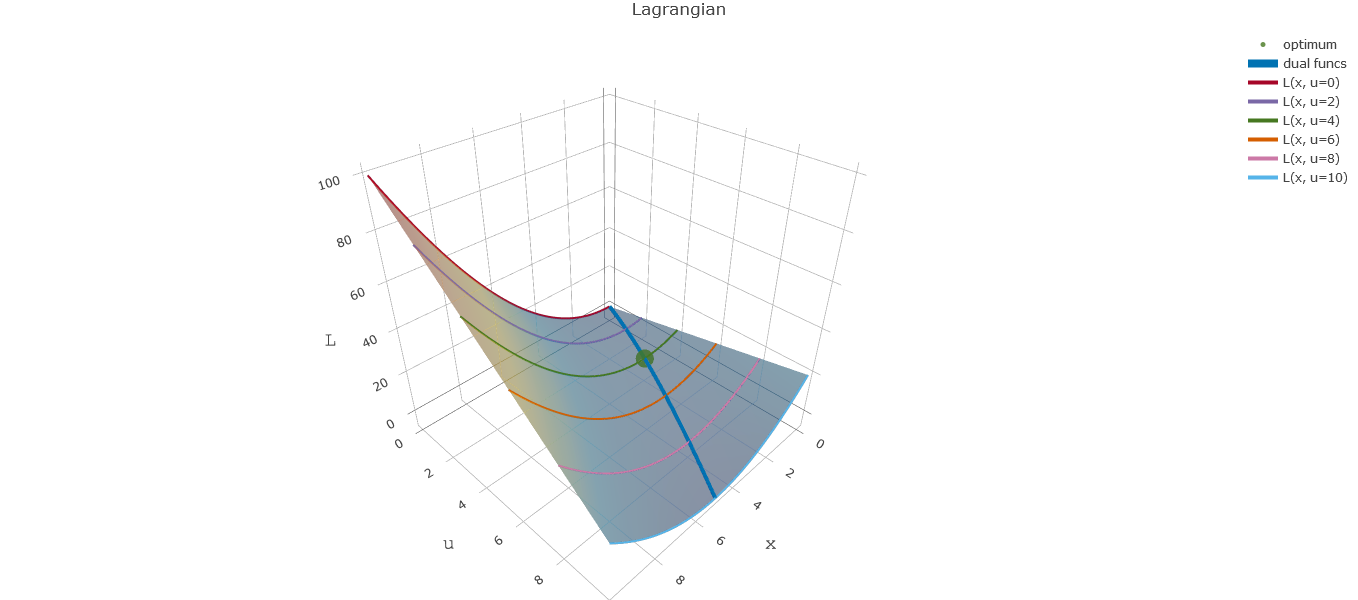

In [3]:
# min x^2 s.t x>=2

k = 2

x1 = np.linspace(0, 10, 100)
u1 = np.linspace(0, 10, 100)
x2 = np.linspace(-10, k, 100)
u2 = np.linspace(0, 10, 100)
x3 = np.linspace(-10, k, 100)
u3 = np.linspace(-10, 0, 100)
x4 = np.linspace(k, 10, 100)
u4 = np.linspace(-10, 0, 100)

X1, U1 = np.meshgrid(x1, u1)
X2, U2 = np.meshgrid(x2, u2)
X3, U3 = np.meshgrid(x3, u3)
X4, U4 = np.meshgrid(x4, u4)

L1 = X1**2 - U1*(X1-k)
L2 = X2**2 - U2*(X2-k)
L3 = X3**2 - U3*(X3-k)
L4 = X4**2 - U4*(X4-k)

x_star = k
u_star = 2*k

U = np.linspace(0, 10, 30)
X_fsb = np.linspace(k, 7.5, 100)
X_infsb = np.linspace(-2.5, k, 100)

L = [X_fsb**2 - u*(X_fsb-k) for u in U]
L_infsb = [X_infsb**2 - u*(X_infsb-k) for u in U]


f_dual = np.array([ [U[i]/2, U[i], (U[i]/2)**2-U[i]*((U[i]/2)-k)] for i in range(len(U)) ])
    
# CS = plt.contour(X, V, L, levels=(2, 3, 4, 6, 8, 10, 15, 20, 25 ))
# plt.clabel(CS, CS.levels,  fmt='%1.0f', inline=True, fontsize=10)
# plt.show()

#['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
# 'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
# 'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis']

# 주어진 곡면
surf1 = go.Surface(x=X1, y=U1, z=L1, showscale=False, 
                   colorscale='Portland', 
                   name='Lagangian',
                   contours=dict(
                      x=dict(show=False, highlight=True, project=dict(x=True), 
                             highlightcolor='#0072b2'),
                      y=dict(show=False, highlight=True, project=dict(y=True), 
                             highlightcolor='#a60628'),
                      z=dict(show=False, highlight=False),
                  ), opacity=.7,
                 )

# surf2 이하는 유용영역을 벗어난 곡면들 실제 그리진 않고 데이터만 만듬
surf2 = go.Surface(x=X2, y=U2, z=L2, showscale=False, 
                   colorscale='Greys', 
                   contours=dict(
                      x=dict(show=False, highlight=True, project=dict(x=True), 
                             highlightcolor='#0072b2'),
                      y=dict(show=False, highlight=True, project=dict(y=True), 
                             highlightcolor='#a60628'),
                      z=dict(show=False, highlight=False),
                  ), opacity=.7,
                 )

surf3 = go.Surface(x=X3, y=U3, z=L3, showscale=False, 
                   colorscale='Greys', 
                   contours=dict(
                      x=dict(show=False, highlight=True, project=dict(x=True), 
                             highlightcolor='#0072b2'),
                      y=dict(show=False, highlight=True, project=dict(y=True), 
                             highlightcolor='#a60628'),
                      z=dict(show=False, highlight=False),
                  ), opacity=.7,
                 )

surf4 = go.Surface(x=X4, y=U4, z=L4, showscale=False, 
                   colorscale='Greys', 
                   contours=dict(
                      x=dict(show=False, highlight=True, project=dict(x=True), 
                             highlightcolor='#0072b2'),
                      y=dict(show=False, highlight=True, project=dict(y=True), 
                             highlightcolor='#a60628'),
                      z=dict(show=False, highlight=False),
                  ), opacity=.7,
                 )

# 최적해
optim = go.Scatter3d(
    x=[x_star],
    y=[u_star],
    z=[x_star**2],
    mode='markers',
    name='optimum',
    marker=dict(
        size=5,
        opacity=0.8,
        color=style_colors[3]
    )
)

# 쌍대함수
phi = go.Scatter3d(
    x=f_dual[:,0],
    y=f_dual[:,1],
    z=f_dual[:,2],
    mode='lines',
    name='dual funcs',
    line = dict(
        color = ('rgb(0,114,178)'),
        width = 8,)
)

U = np.linspace(0, 10, 6)
X = np.linspace(0, 10, 100)
Lu = [X**2 - u*(X-k) for u in U]

Lugo = []
for i, lu in enumerate(Lu) :
    Lugo.append(go.Scatter3d(
        x=X,
        y=np.ones(X.shape)*U[i],
        z=lu, 
        mode='lines',
        name='L(x, u={:d})'.format(int(U[i])),
        line = dict(color=style_colors[i+1], 
                    width=4)
        ))


data = [surf1, optim, phi] #, surf2, surf3, surf4, 
for lugo in Lugo:
    data.append(lugo)

layout = go.Layout(
    title="Lagrangian",
    autosize=False, 
    width=600, height=600,
    margin=dict(l=0, r=0, b=0, t=30),
    scene=dict(xaxis=dict(title="x", showspikes=False, titlefont=dict(
                            size=20,
                            family="Courier New, monospace",)),
               yaxis=dict(title="u", showspikes=False, titlefont=dict(
                            size=20,
                            family="Courier New, monospace",)),
               zaxis=dict(title="L", showspikes=False, titlefont=dict(
                            size=20,
                            family="Courier New, monospace",))
              )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

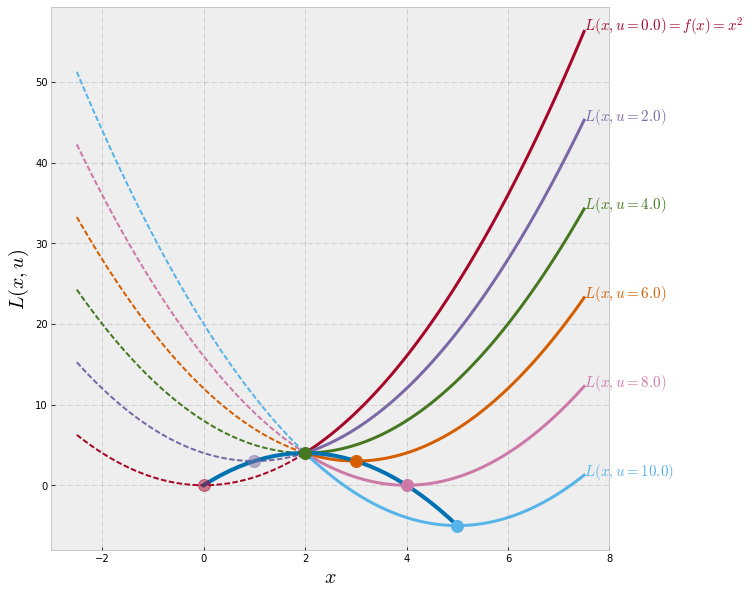

In [4]:
plt.rcParams["figure.figsize"] = (10,10)

U = np.linspace(0, 10, 6)
X_fsb = np.linspace(k, 7.5, 100)
X_infsb = np.linspace(-2.5, k, 100)

L = [X_fsb**2 - u*(X_fsb-k) for u in U]
L_infsb = [X_infsb**2 - u*(X_infsb-k) for u in U]

for i, l in enumerate(zip(L, L_infsb)) :
    x_star = U[i] / 2
    L_x_star = x_star**2 - U[i]*(x_star - k)
    
    if i == 0 :
        label = '$L(x, u={})=f(x)=x^2$'.format(U[i])
        plt.plot(X_fsb, l[0], lw=3, label=label, color=style_colors[i+1])
        plt.plot(X_infsb, l[1], '--', lw=2, color=style_colors[i+1])
    else :
        label = '$L(x, u={})$'.format(U[i])
        plt.plot(X_fsb, l[0], lw=3, label=label, color=style_colors[i+1])
        plt.plot(X_infsb, l[1], '--', lw=2, color=style_colors[i+1])
    
    plt.text(X_fsb[-1], l[0][-1], label, fontsize=15,  color=style_colors[i+1])
    
    if x_star < k :
        plt.plot(x_star, L_x_star, 'o', markersize=12, fillstyle='none', 
                 markeredgecolor=style_colors[i+1], 
                 markerfacecolor=style_colors[i+1], alpha=0.5, zorder=10)
    else :
        plt.plot(x_star, L_x_star, 'o', markersize=12, 
                 markeredgecolor=style_colors[i+1], 
                 markerfacecolor=style_colors[i+1], zorder=10)


plt.plot(f_dual[:,0], f_dual[:,2], lw=4, color=style_colors[9])
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$L(x,u)$', fontsize=20)
plt.show()

위 그림은 라그랑지안 함수를 $u=0.0, 2.0, 4.0, 6.0, 8.0, 10.0$에서 $x$에 대해서 그린것이다. 제약조건이 $x \le 2$이므로 점선은 불용영역을 나타내고 실선은 유용영역을 나타낸다. 둥근 점은 각 그래프의 최소값을 나타낸다. 위 그래프를 보면서 제약조건과 코스트 함수를 라그랑지 승수로 섞은 함수인 라그랑지안의 기하학적 의미를 생각해볼 수 있다. 

그래프들을 보면 모두 2차 다항함수이고 최소값이 존재한다. 라그랑지안은 주어진 코스트함수에 라그랑지 승수 차원을 추가하여 추가된 차원 방향으로 원래 코스트 함수를 이동시켜가며 만들어진 $n+p$변수 함수이다. 예제에서 $n=1, p=1$이므로 라그랑지안은 2변수 함수가 되었다. 다시말해 라그랑지안은 라그랑지 승수 차원 방향으로 원래의 코스트함수와 제약조건을 적당히 섞은 비제약 최소화 문제를 무수히 많이 만들어놓게 되는 것이다. 라그랑지 승수 $u$에 값을 지정하면 무수히 많은 비제약 최소화 문제중 하나를 선택하게 되는 것이다. 위 그래프는 그렇게 선택된 함수 6개를 그려 놓은 것이다.
이 상태에서 선택된 비제약 최적화문제를 원래 코스트함수의 변수 $x$에 대해 최소화 시킨 값을 함수값으로 가지는 함수가 쌍대 함수 $\phi(u)$이다. 둥근 점은 $x$에 대해서 최소화 된 값들인데 그 값들은 주어진 $u$에 대해서 다 다르기 때문에 둥근 점들의 모임은 모든 $u$에 대해서 $x$를 최소화 시킨 함수 $\phi(u) = \min_{x} L(x, u) $이 되는 것이다. 위 그림에서는 둥근 점을 모두 이은 진한 파란색 그래프가 $x$축을 바라보는 방향에서 본 $\phi(u)$이다. 그림에서도 확인할 수 있는 것처럼 최적해인 초록색 원은 $\max_{u} \phi(u)$, 곧 최대화 문제인 쌍대문제의 최적해가 되는 것을 알 수 있으며 이를 강한 쌍대성 정리로부터 확인하였다.


라그랑지 승수 $u=0.0$으로 주어졌을 때 선택되는 비제약 최소화 문제는 위 그래프에서 빨간색 그래프이다. 이 그래프는 원래 코스트 함수와 똑같고 이 결과는 제약조건이 비활성화된 경우임을 알 수 있다. 빨간색 점은 비제약 상태에서 최적해를 나타내고 있으며 결과적으로 점선위에 존재하여 불용해가 된다. 이제 라그랑지 승수가 2가 되면 제약조건이 활성화되며 보라색 그래프의 최소값을 찾게 된다. 하지만 이경우 구해진 해는 원래 문제의 제약조건을 위배하므로 원래 문제의 해가 될 수 없다. 라그랑지 승수가 4가 되면 구해진 최적해는 제약조건을 위배하지 않아서 최적해가 될 자격이 있다. 초록, 주황, 분홍색 역시 마찬가지 인데 이 유용해중에서 KKT조건 중 라그랑지 승수로 미분한 경사도 조건을 만족시키는 점은 초록색 점밖에 없다. 여기서 주목해야할 것은 초록색점이 $u$에 대한 함수의 최소점으로서 경사도 조건을 만족시키는 것이 아니라 최대점으로서 경사도 조건을 만족시킨다는 것이다. (KKT 조건은 최소를 위한 필요충분조건이 아니라 필요조건일 뿐이다.) 아래 그림은 3차원 형상으로 라그랑지안에서 $u=0.0, 2.0, 8.0$인 경우를 각각 나타낸것이다. $\phi(u)$와 비제약 최적해의 이동 위치를 눈여겨 볼 필요가 있다.

<img src="dual1-anno.png" width="400">
<img src="dual2-anno.png" width="400">
<img src="dual3-anno.png" width="400">

마지막으로 실선 그래프 상의 모든 점들은 유용해(원래 제약 조건이 주어진 문제에서 유용영역에 있는 모든 점)가 된다. 다시말해 실선상의 어떤 $x$, $u$는 제약조건을 만족한다는 것이다. 이런 임의의 $x$, $u$에 대해서 그래프상에 값을 찍어보면 $(x=2,u=4)$인 경우를 제외하고는 $f(x)$가 $\phi(u)$보다 큰 것을 확인할 수 있다. 예를 들어 $(x=4, u=2)$는 두 제약조건 $x \ge 2$, $u \ge 0$을 모두 만족시키므로 유용해이다. 이제 그래프 상에서 $f(x=4)$와 $\phi(u=2)$를 표시해보면 다음 그림과 같고 두 값 사이에 간격이 발생하게 된다. 

f(x=4.0)   = 16.0
phi(u=2.0) = 3.0


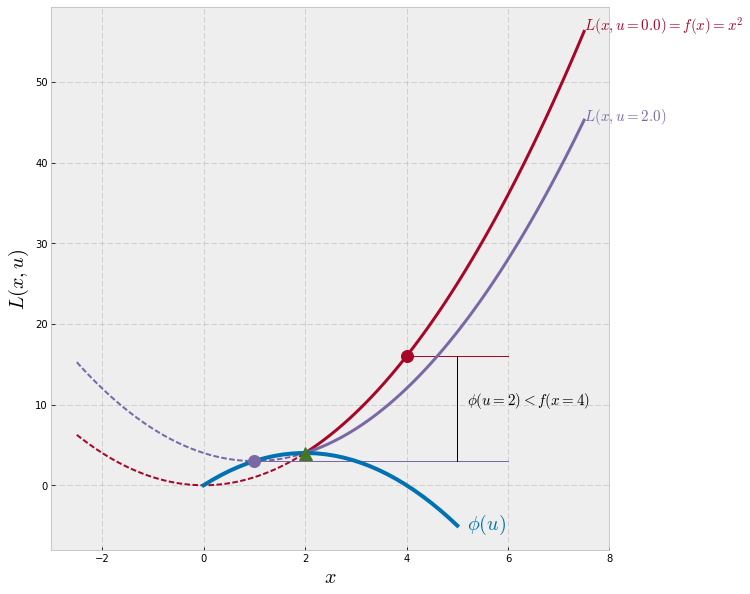

In [5]:
x_fsb = 4
u_fsb = 2

for i, l in enumerate(zip(L, L_infsb)) :
    
    if i == 2 :
        break
        
    x_star = U[i] / 2
    L_x_star = x_star**2 - U[i]*(x_star - k)
    
    if i < 2 :
        if i == 0 :
            label = '$L(x, u={})=f(x)=x^2$'.format(U[i])
            plt.plot(X_fsb, l[0], lw=3, label=label, color=style_colors[i+1])
            plt.plot(X_infsb, l[1], '--', lw=2, color=style_colors[i+1])
            plt.plot(x_fsb, x_fsb**2, 'o', markersize=12, 
                     markeredgecolor=style_colors[i+1], 
                     markerfacecolor=style_colors[i+1], zorder=10)
            plt.plot([x_fsb, 6],[x_fsb**2, x_fsb**2], lw=1, color=style_colors[i+1])
            print("f(x={:.1f})   = {:.1f}".format(x_fsb, x_fsb**2))
        else :
            label = '$L(x, u={})$'.format(U[i])
            plt.plot(X_fsb, l[0], lw=3, label=label, color=style_colors[i+1])
            plt.plot(X_infsb, l[1], '--', lw=2, color=style_colors[i+1])
            plt.plot(x_star, L_x_star, 'o', markersize=12, 
                     markeredgecolor=style_colors[i+1], 
                     markerfacecolor=style_colors[i+1], zorder=10)
            plt.plot([x_star, 6],[L_x_star, L_x_star], lw=1, color=style_colors[i+1])
            print( "phi(u={:.1f}) = {:.1f}".format(u_fsb, L_x_star) )
                        
        plt.text(X_fsb[-1], l[0][-1], label, fontsize=15,  color=style_colors[i+1])
            
plt.plot(2, 4, '^', markersize=13, markeredgecolor=style_colors[3],
         markerfacecolor=style_colors[3], zorder=10)
plt.plot(f_dual[:,0], f_dual[:,2], lw=4, color=style_colors[9])

plt.plot([5,5],[x_fsb**2, L_x_star], lw=1, color='k')

plt.text(5.2, -5.5, r"$\phi(u)$", fontsize=20, color=style_colors[9])
plt.text(5.2, 10, r"$\phi(u=2) < f(x=4)$", fontsize=15)
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$L(x,u)$', fontsize=20)
plt.show()

그림을 보면 빨간색 실선이 파란색 실선보다 위에 있기 때문에 유용역역에서 $\phi(u) < f(x)$인 것을 확인할 수 있고 $(x=2, u=4)$인 경우 두 값은 삼각형 점에서 일치하며 이는 강한 쌍대 정리에 해당되는 경우이다. 즉 그림을 통해 유용영역에 있는 $x, v, u$(예제의 경우는 부등호 제약만 있어서 $v$는 나타나고 있지 않지만)에 대해서 다음 식이 성립함을 실험적으로 확인 할 수 있다. 

$$
\phi(v,u) = \min_{x}L(x, v, u) \le L(x, v, u)=f(x) + v  h(x) + u g(x) \le f(x)
$$

프로그램 출력을 보면 $f(x=4)=16$, $\phi(u=2)=3$인데 3은 $f(x)$가 유용영역내에서 낮아질 수 있는 하한 값을 나타낸다. 이 문제에서 최대 하한은 4이며 이는 주어진 최소화 문제의 최소값과 일치하는 값이다.
이상으로 강한 쌍대 정리와 약한 쌍대 정리의 증명을 그림으로도 확인해 보았다. 

### 정리

지금까지 제약 최적화 문제에서 구성되는 라그랑지안의 헤시안이 양정일때 그와 동일한 최적해를 가지는 쌍대문제가 있음을 알아보았다. 전역적으로 헤시안이 양정이 아니라 하더라도 다시말해 문제가 볼록계획 문제가 아니라 하더라도 국부적으로 헤시안이 양정이 되면 쌍대정리를 적용할 수 있음도 확인했다. 이에 대한 예제를 파이썬 코드와 그래프로 설명한 글은 [daul_exam]에서 확인할 수 있다.

### 부록 

#### 양정행렬은 정칙행렬인가?

역행렬의 존재정리에 의해 $\text{det} \mathbf{A} \ne 0$이면 역행렬이 존재한다. 반대로 $\text{det} \mathbf{A} = 0$이면 특이행렬인데 $\text{det} \mathbf{A}$는 모든 고유값의 곱과 같다. 행렬 $\mathbf{A}$는 양정으로 모든 고유값은 양수이므로  $\text{det} \mathbf{A} \ne 0$이어서 항상 역행렬이 존재한다. 또는 다음 처럼도 가능하다.

변수 개수가 $n$인 제차 선형연립방정식 $\mathbf{Ax}=\mathbf{0}$가 $\mathbf{x} \ne \mathbf{0}$인 $\mathbf{x}$에 대해 성립한다면 그 $\mathbf{x}$에 대해 다음이 성립한다.

$$
\mathbf{Ax}= 0 \mathbf{x}
$$

위 식이 성립한다면 $\mathbf{x}$는 고유벡터, 0은 고유값이 된다. 하지만 행렬 $\mathbf{A}$에 대해 0은 고유값이 될 수 없으므로 $\mathbf{x} \ne \mathbf{0}$인 $\mathbf{x}$가 존재한다는 가정이 틀린것이다. 즉, 제차 선형연립방정식을 만족하는 해는 자명해 $\mathbf{x}=\mathbf{0}$밖에 없다. 이는 행렬 $\mathbf{A}$의 계수<sup>rank</sup>가 $n$임을 의미하고 이는 곧 역행렬이 존재함을 의미한다. 



## 참고문헌

1. [arora_1] 53:235 Applied Optimal Design - Fall 2006; J. S. Arora, http://user.engineering.uiowa.edu/~design1/53-235%20AOD/Duality_NLP.pdf

2. [arora_2] INTRODUCTION TO OPTIMUM ESIGN 4th ed., J. S. Arora, Academic Press

3. [colorado_ifem] 벡터미분의 연쇄법칙 순서, Introduction to Finite Element Methods 강의 자료 부록 C.3, https://www.colorado.edu/engineering/CAS/courses.d/IFEM.d/IFEM.AppC.d/IFEM.AppC.pdf

4. [jo] 벡터, 행렬에 대한 미분Derivatives for vectors and matrices, https://metamath1.github.io/2018/01/02/matrix-derivatives.html

5. [곽도영] 벡터미적분학, 곽도영, 서동엽, 임진환, 진교택, 경문사

6. [IFT:wiki] Implicit function theorem, https://en.wikipedia.org/wiki/Implicit_function_theorem

7. [미분적분학] 미분적분학, 억제된 변수에 대한 도함수

8. [math.stackexchange_1] Product of maximal rank matrices with a positive definite matrix, https://math.stackexchange.com/questions/1480156/product-of-maximal-rank-matrices-with-a-positive-definite-matrix

9. [nocedal] Numerical Optimization, Jorge Nocedal, Stephen J. Wright, Springer

10. [bazaraa] Nonlinear Programming - Theory and Algorithms, Mokhtar S. Bazarra, Hanif D. Sherali, C. M. Shetty, JOHN WILEY & SONS

11. [boyd] Convex Optimization, Stephen Boyd, Lieven Vandenberghe, CAMBRIDGE UNIV. Press

12. [griva] Linear and Nonlinear Optimization, Igor Griva et. al, SIAM

13. [math125b] Math 125B: Real Analysis, Spring 2013-The Supremum and Infimum (https://www.math.ucdavis.edu/~hunter/m125b/m125b.html), https://www.math.ucdavis.edu/~hunter/m125b/ch2.pdf

14. [proofwiki] Supremum of Sum equals Sum of Suprema, https://proofwiki.org/wiki/Supremum_of_Sum_equals_Sum_of_Suprema

15. [math.stackexchange_2] https://math.stackexchange.com/questions/1564360/sum-of-the-supremum-and-supremum-of-a-sum

16. [daul_exam] http://nbviewer.jupyter.org/github/metamath1/ml-simple-works/blob/master/svm/duality_example.ipynb

In [6]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<!--https://github.com/kattergil/NotoSerifKR-Web/stargazers-->
<link href='https://cdn.rawgit.com/kattergil/NotoSerifKR-Web/5e08423b/stylesheet/NotoSerif-Web.css' rel='stylesheet' type='text/css'>
<!--https://github.com/Joungkyun/font-d2coding-->
<link href="http://cdn.jsdelivr.net/gh/joungkyun/font-d2coding/d2coding.css" rel="stylesheet" type="text/css">
<style>
    h1 { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2 { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    h4 { font-family: 'Noto Sans KR' !important; color:#7A68A6 !important;   }        
            
    p:not(.navbar-text) { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li:not(.dropdown):not(.p-TabBar-tab):not(.p-MenuBar-item):not(.jp-DirListing-item):not(.p-CommandPalette-header):not(.p-CommandPalette-item):not(.jp-RunningSessions-item):not(.p-Menu-item)   
            { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    table  { font-family: 'Noto Sans KR' !important;  font-size: 11pt !important; }           
    li > p  { text-indent: 0px; }
    li > ul { margin-top: 0px !important; }       
    sup { font-family: 'Noto Sans KR'; font-size: 9pt; } 
    code, pre  { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important; line-height: 130% !important;}
    .code-body { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important;}
    .ns        { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .summary   {
                   font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
                   border-left:3px solid #D55E00; 
                   padding-left:20px; 
                   margin-top:10px;
                   margin-left:15px;
               }
    .green { color:#467821 !important; }
    .comment { font-family: 'Noto Sans KR'; font-size: 10pt; }
</style>